<a href="https://colab.research.google.com/github/ArtuomMerkulov/ArtuomMerkulov/blob/main/%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D0%92%D0%92%D0%9F%20%D1%81%D1%82%D1%80%D0%B0%D0%BD%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Прогнозирование ВВП стран на 2024 год и далее.




In [1]:
import pandas as pd #Пандас
import matplotlib.pyplot as plt #Отрисовка графиков
from tensorflow.keras.utils import to_categorical 
import numpy as np #Numpy
from tensorflow.keras.optimizers import Adam #Оптимизатор
from tensorflow.keras.models import Sequential, Model #Два варианты моделей
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM, GlobalMaxPooling1D, MaxPooling1D, RepeatVector #Стандартные слои
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Нормировщики
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator # для генерации выборки временных рядов

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip '/content/drive/MyDrive/Numpy/ВВП стран на начало 2023.zip'

Archive:  /content/drive/MyDrive/Numpy/ВВП стран на начало 2023.zip
  inflating: World GDP Dataset.csv   


In [4]:
base_data = pd.read_csv('/content/World GDP Dataset.csv')

In [5]:
base_data

,"GDP, current prices (Billions of U.S. dollars)",1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,20.616,20.057,18.020,18.883,18.401,18.876,20.136,0.000,0.000,0.000
1,Albania,1.946,2.229,2.296,2.319,2.290,2.339,2.587,2.566,2.530,...,13.246,11.389,11.862,13.053,15.157,15.399,15.161,18.310,18.256,18.842
2,Algeria,42.346,44.372,44.780,47.529,51.513,61.132,61.535,63.300,51.664,...,213.810,165.979,160.034,170.207,175.372,171.680,144.922,162.711,187.155,190.254
3,Andorra,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,3.267,2.789,2.895,2.993,3.217,3.155,2.885,3.330,3.302,3.360
4,Angola,6.639,6.214,6.214,6.476,6.864,8.457,7.918,9.050,9.818,...,145.712,116.194,101.124,122.022,101.353,84.516,58.125,75.179,124.794,135.558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
base_data = base_data.dropna()

base_data

,"GDP, current prices (Billions of U.S. dollars)",1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,20.616,20.057,18.020,18.883,18.401,18.876,20.136,0.000,0.000,0.000
1,Albania,1.946,2.229,2.296,2.319,2.290,2.339,2.587,2.566,2.530,...,13.246,11.389,11.862,13.053,15.157,15.399,15.161,18.310,18.256,18.842
2,Algeria,42.346,44.372,44.780,47.529,51.513,61.132,61.535,63.300,51.664,...,213.810,165.979,160.034,170.207,175.372,171.680,144.922,162.711,187.155,190.254
3,Andorra,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,3.267,2.789,2.895,2.993,3.217,3.155,2.885,3.330,3.302,3.360
4,Angola,6.639,6.214,6.214,6.476,6.864,8.457,7.918,9.050,9.818,...,145.712,116.194,101.124,122.022,101.353,84.516,58.125,75.179,124.794,135.558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Vietnam,35.357,17.617,23.369,35.204,61.171,19.045,43.009,53.385,29.501,...,232.888,236.795,252.146,277.071,303.091,327.873,342.941,366.201,413.808,469.620
192,West Bank and Gaza,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,13.990,13.972,15.405,16.128,16.277,17.134,15.532,18.037,18.818,19.398
193,Yemen,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,43.229,42.444,31.318,26.842,21.606,21.888,18.850,19.911,27.594,28.099
194,Zambia,4.246,4.385,4.232,3.653,3.003,2.848,1.962,2.431,4.095,...,27.145,21.245,20.965,25.874,26.312,23.309,18.111,21.313,27.025,28.798


In [7]:
base_data = base_data.replace([0.000000], min(filter(lambda x: x > 0, base_data["1980"])))
base_data

,"GDP, current prices (Billions of U.S. dollars)",1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,...,20.616,20.057,18.020,18.883,18.401,18.876,20.136,0.032,0.032,0.032
1,Albania,1.946,2.229,2.296,2.319,2.290,2.339,2.587,2.566,2.530,...,13.246,11.389,11.862,13.053,15.157,15.399,15.161,18.310,18.256,18.842
2,Algeria,42.346,44.372,44.780,47.529,51.513,61.132,61.535,63.300,51.664,...,213.810,165.979,160.034,170.207,175.372,171.680,144.922,162.711,187.155,190.254
3,Andorra,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,...,3.267,2.789,2.895,2.993,3.217,3.155,2.885,3.330,3.302,3.360
4,Angola,6.639,6.214,6.214,6.476,6.864,8.457,7.918,9.050,9.818,...,145.712,116.194,101.124,122.022,101.353,84.516,58.125,75.179,124.794,135.558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Vietnam,35.357,17.617,23.369,35.204,61.171,19.045,43.009,53.385,29.501,...,232.888,236.795,252.146,277.071,303.091,327.873,342.941,366.201,413.808,469.620
192,West Bank and Gaza,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,...,13.990,13.972,15.405,16.128,16.277,17.134,15.532,18.037,18.818,19.398
193,Yemen,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.032,...,43.229,42.444,31.318,26.842,21.606,21.888,18.850,19.911,27.594,28.099
194,Zambia,4.246,4.385,4.232,3.653,3.003,2.848,1.962,2.431,4.095,...,27.145,21.245,20.965,25.874,26.312,23.309,18.111,21.313,27.025,28.798


In [8]:
base_data = base_data.transpose()
base_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,193,194,195
count,45.000,45,45,45.000,45.000,45.00,45,45.000,45.000,45,...,45,45,45.000,45.000,45.000,45,45.000,45.000,45,45.000
unique,21.000,45,45,26.000,44.000,44.00,45,34.000,31.000,45,...,45,45,34.000,43.000,44.000,45,32.000,36.000,45,36.000
top,0.032,Albania,Algeria,0.032,6.214,1.37,Argentina,0.032,0.032,Australia,...,United States,Uruguay,0.032,0.114,59.865,Vietnam,0.032,0.032,Zambia,0.032
freq,25.000,1,1,20.000,2.000,2.00,1,12.000,15.000,1,...,1,1,12.000,2.000,2.000,1,14.000,10.000,1,10.000


In [9]:
base_data = pd.DataFrame(base_data.values[1:], columns=base_data.iloc[0])
base_data

"GDP, current prices (Billions of U.S. dollars)",Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,0.032,1.946,42.346,0.032,6.639,0.131,233.696,0.032,0.032,162.821,...,2857.325,12.165,0.032,0.121,69.841,35.357,0.032,0.032,4.246,0.032
1,0.032,2.229,44.372,0.032,6.214,0.148,189.802,0.032,0.032,188.29,...,3207.025,13.578,0.032,0.114,78.367,17.617,0.032,0.032,4.385,0.032
2,0.032,2.296,44.78,0.032,6.214,0.164,94.25,0.032,0.032,186.93,...,3343.8,11.1,0.032,0.114,79.998,23.369,0.032,0.032,4.232,0.032
3,0.032,2.319,47.529,0.032,6.476,0.182,116.267,0.032,0.032,179.364,...,3634.025,6.093,0.032,0.117,79.672,35.204,0.032,0.032,3.653,0.032
4,0.032,2.29,51.513,0.032,6.864,0.208,130.544,0.032,0.032,197.011,...,4037.65,5.794,0.032,0.144,57.826,61.171,0.032,0.032,3.003,0.032
5,0.032,2.339,61.132,0.032,8.457,0.241,98.599,0.032,0.032,174.274,...,4339.0,5.662,0.032,0.132,59.865,19.045,0.032,0.032,2.848,0.032
6,0.032,2.587,61.535,0.032,7.918,0.29,118.565,0.032,0.032,181.362,...,4579.625,7.029,0.032,0.128,60.877,43.009,0.032,0.032,1.962,0.032
7,0.032,2.566,63.3,0.032,9.05,0.337,121.561,0.032,0.032,212.964,...,4855.25,8.794,0.032,0.139,46.854,53.385,0.032,0.032,2.431,0.032
8,0.032,2.53,51.664,0.032,9.818,0.399,142.386,0.032,0.032,270.916,...,5236.425,9.098,0.032,0.158,60.378,29.501,0.032,0.032,4.095,0.032
9,0.032,2.779,52.558,0.032,11.421,0.439,91.352,0.032,0.032,308.103,...,5641.6,9.589,0.032,0.154,44.672,7.991,0.032,0.032,4.365,0.032


In [11]:
txt = base_data.values[31]
print(txt)

[17.89 12.899 200.02 3.625 111.79 1.138 527.644 10.142 2.638 1514.658
 431.609 65.99 10.07 28.777 154.097 4.658 61.368 523.239 1.814 10.691
 1.695 24.135 18.629 15.111 2614.027 18.525 57.68 12.078 2.236 1.866
 12.817 30.626 1793.327 2.435 12.183 251.084 7492.212 334.966 1.023 25.853
 15.653 42.762 63.17 27.56 229.563 35.529 344.003 1.739 0.501 58.088
 79.277 247.726 20.284 21.357 2.065 23.21 4.826 30.48 4.094 275.556
 2864.653 18.207 1.41 15.107 3748.655 53.849 282.946 0.779 47.419 6.034
 1.157 3.328 13.009 17.71 248.514 141.76 15.222 1823.052 892.59 625.43
 185.75 238.959 266.792 2294.591 14.413 6233.147 29.524 192.626 46.555
 0.181 1253.419 6.34 154.02 6.198 8.964 27.74 39.927 2.571 2.34 48.17
 43.584 61.685 36.844 11.552 11.241 302.643 2.629 12.993 9.637 0.172 6.782
 11.518 1180.487 0.311 8.417 10.41 4.544 109.705 14.382 53.916 12.423
 0.066 21.682 905.111 166.943 9.774 8.754 414.095 10.499 498.283 77.497
 240.385 0.193 34.686 17.985 33.737 170.923 234.217 528.292 245.075
 100.352 1

In [12]:
base_data23 = base_data
data2023 = base_data23.iloc[:,2:]

In [13]:
data2023.shape[0]

44

In [14]:
# Выводим параметры одного файла
d = data2023
print(len(d)) # Сколько есть записей
print(len(d.iloc[10])) # Длина одной строки данных
print(d.iloc[10]) # Пример первой строки данных

44
194
GDP, current prices (Billions of U.S. dollars)
Algeria                 61.892
Andorra                  0.032
Angola                  12.571
Antigua and Barbuda      0.459
Argentina              158.024
                        ...   
Vietnam                  8.217
West Bank and Gaza       0.032
Yemen                   12.644
Zambia                   4.085
Zimbabwe                10.144
Name: 10, Length: 194, dtype: object


In [15]:
data = data2023.copy()
data = np.array(data) 

In [16]:
print(len(data))     

44


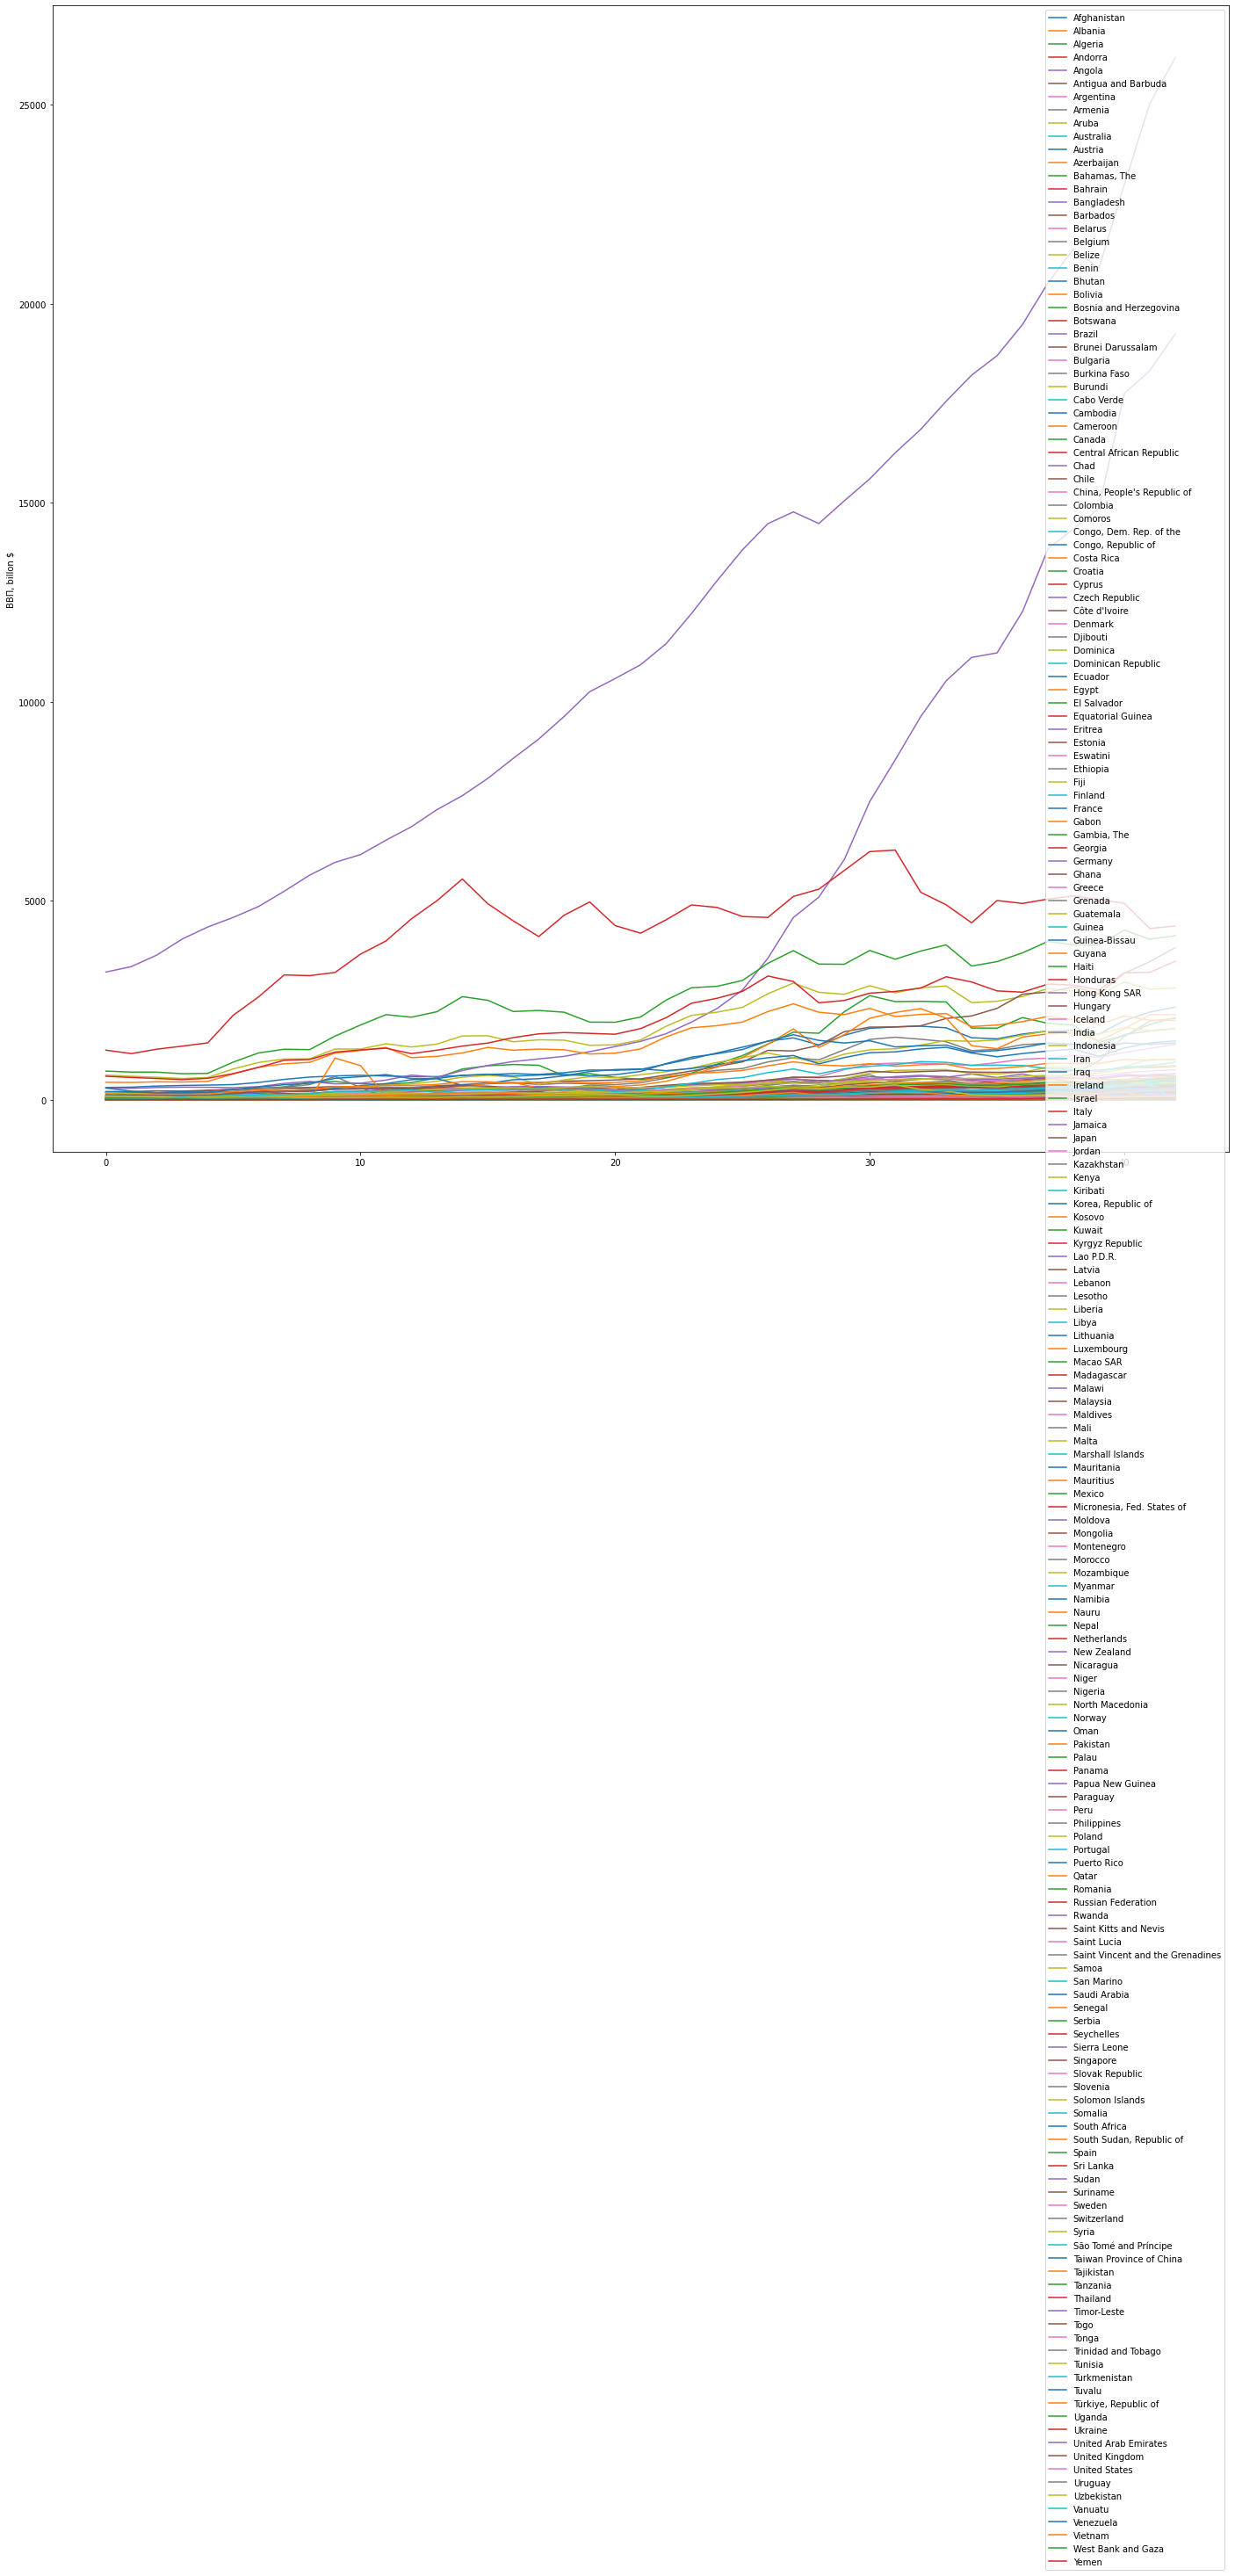

In [17]:
#Отображаем исходные от точки start и длинной stop
start = 1           
#stop = data.shape[0] #Сколько точек отрисуем
length = 101
#Заполняем текстовые названия каналов данных
chanelNames = ['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 "China, People's Republic of",
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep. of the',
 'Congo, Republic of ',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 "Côte d'Ivoire",
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia, The',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Kong SAR',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kiribati',
 'Korea, Republic of',
 'Kosovo',
 'Kuwait',
 'Kyrgyz Republic',
 'Lao P.D.R.',
 'Latvia',
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Libya',
 'Lithuania',
 'Luxembourg',
 'Macao SAR',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Maldives',
 'Mali',
 'Malta',
 'Marshall Islands',
 'Mauritania',
 'Mauritius',
 'Mexico',
 'Micronesia, Fed. States of',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nauru',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'Nicaragua',
 'Niger',
 'Nigeria',
 'North Macedonia ',
 'Norway',
 'Oman',
 'Pakistan',
 'Palau',
 'Panama',
 'Papua New Guinea',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Puerto Rico',
 'Qatar',
 'Romania',
 'Russian Federation',
 'Rwanda',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'Samoa',
 'San Marino',
 'Saudi Arabia',
 'Senegal',
 'Serbia',
 'Seychelles',
 'Sierra Leone',
 'Singapore',
 'Slovak Republic',
 'Slovenia',
 'Solomon Islands',
 'Somalia',
 'South Africa',
 'South Sudan, Republic of',
 'Spain',
 'Sri Lanka',
 'Sudan',
 'Suriname',
 'Sweden',
 'Switzerland',
 'Syria',
 'São Tomé and Príncipe',
 'Taiwan Province of China',
 'Tajikistan',
 'Tanzania',
 'Thailand',
 'Timor-Leste',
 'Togo',
 'Tonga',
 'Trinidad and Tobago',
 'Tunisia',
 'Turkmenistan',
 'Tuvalu',
 'Türkiye, Republic of',
 'Uganda',
 'Ukraine',
 'United Arab Emirates',
 'United Kingdom',
 'United States',
 'Uruguay',
 'Uzbekistan',
 'Vanuatu',
 'Venezuela',
 'Vietnam',
 'West Bank and Gaza',
 'Yemen',
 'Zambia',
 'Zimbabwe']

plt.figure(figsize=(24,24))
for i in range(194):
  plt.plot(data[start:start+length,i], 
          label=chanelNames[i])
plt.ylabel('ВВП, billon $')
plt.legend()
plt.show()

#Канал volume
#plt.figure(figsize=(24,24))
#plt.bar(x=np.arange(length), height=data[start:start+length,193], label="ВВП, billon $")
#plt.legend()
#plt.show()

### Использование TimeseriesGenerator

In [18]:
import numpy as np # Подключаем numpy
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator # Подлкючаем модуль TimeseriesGenerator

In [19]:
test_array = np.arange(200) # Создаем тестовый массив из полседовательности чисел 
print(test_array) # Выводим на экран созданный массив

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199]


In [20]:
x_train = test_array # Создаем x_train
y_train = test_array # Создаем y_train

# Создаем генератор
gen = TimeseriesGenerator(
    x_train,
    y_train,
    length= 10,
    sampling_rate=1,
    stride=1,
    batch_size=5
    )

In [21]:
# Формируем цикл for для прохождения по элементам генератора
for i, g in enumerate(gen):
  print('Батч №', i)
  print('x_train:', g[0])
  print('y_train:', g[1])
  print()

Батч № 0
x_train: [[ 0  1  2  3  4  5  6  7  8  9]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 2  3  4  5  6  7  8  9 10 11]
 [ 3  4  5  6  7  8  9 10 11 12]
 [ 4  5  6  7  8  9 10 11 12 13]]
y_train: [10 11 12 13 14]

Батч № 1
x_train: [[ 5  6  7  8  9 10 11 12 13 14]
 [ 6  7  8  9 10 11 12 13 14 15]
 [ 7  8  9 10 11 12 13 14 15 16]
 [ 8  9 10 11 12 13 14 15 16 17]
 [ 9 10 11 12 13 14 15 16 17 18]]
y_train: [15 16 17 18 19]

Батч № 2
x_train: [[10 11 12 13 14 15 16 17 18 19]
 [11 12 13 14 15 16 17 18 19 20]
 [12 13 14 15 16 17 18 19 20 21]
 [13 14 15 16 17 18 19 20 21 22]
 [14 15 16 17 18 19 20 21 22 23]]
y_train: [20 21 22 23 24]

Батч № 3
x_train: [[15 16 17 18 19 20 21 22 23 24]
 [16 17 18 19 20 21 22 23 24 25]
 [17 18 19 20 21 22 23 24 25 26]
 [18 19 20 21 22 23 24 25 26 27]
 [19 20 21 22 23 24 25 26 27 28]]
y_train: [25 26 27 28 29]

Батч № 4
x_train: [[20 21 22 23 24 25 26 27 28 29]
 [21 22 23 24 25 26 27 28 29 30]
 [22 23 24 25 26 27 28 29 30 31]
 [23 24 25 26 27 28 29 30 31 32]
 [24 2

In [22]:
x_train = test_array[:-1] # Создаем x_train
y_train = test_array[1:] # Создаем y_train

# Создаем генератор
gen = TimeseriesGenerator(
    x_train,
    y_train,
    length= 10,
    sampling_rate=1,
    stride=1,
    batch_size=1
    )
# Формируем цикл for для прохождения по элементам генератора
for i, g in enumerate(gen):
  print('Батч №', i)
  print('x_train:', g[0])
  print('y_train:', g[1])
  print()

Батч № 0
x_train: [[0 1 2 3 4 5 6 7 8 9]]
y_train: [11]

Батч № 1
x_train: [[ 1  2  3  4  5  6  7  8  9 10]]
y_train: [12]

Батч № 2
x_train: [[ 2  3  4  5  6  7  8  9 10 11]]
y_train: [13]

Батч № 3
x_train: [[ 3  4  5  6  7  8  9 10 11 12]]
y_train: [14]

Батч № 4
x_train: [[ 4  5  6  7  8  9 10 11 12 13]]
y_train: [15]

Батч № 5
x_train: [[ 5  6  7  8  9 10 11 12 13 14]]
y_train: [16]

Батч № 6
x_train: [[ 6  7  8  9 10 11 12 13 14 15]]
y_train: [17]

Батч № 7
x_train: [[ 7  8  9 10 11 12 13 14 15 16]]
y_train: [18]

Батч № 8
x_train: [[ 8  9 10 11 12 13 14 15 16 17]]
y_train: [19]

Батч № 9
x_train: [[ 9 10 11 12 13 14 15 16 17 18]]
y_train: [20]

Батч № 10
x_train: [[10 11 12 13 14 15 16 17 18 19]]
y_train: [21]

Батч № 11
x_train: [[11 12 13 14 15 16 17 18 19 20]]
y_train: [22]

Батч № 12
x_train: [[12 13 14 15 16 17 18 19 20 21]]
y_train: [23]

Батч № 13
x_train: [[13 14 15 16 17 18 19 20 21 22]]
y_train: [24]

Батч № 14
x_train: [[14 15 16 17 18 19 20 21 22 23]]
y_train: [25]



In [23]:
x_train = test_array # Создаем x_train
y_train = [[x, x+1] for x in range(200)] # Создаем y_train

# Создаем генератор
gen = TimeseriesGenerator(
    x_train,
    y_train,
    length= 10,
    sampling_rate=1,
    stride=1,
    batch_size=1
    )
# Формируем цикл for для прохождения по элементам генератора
for i, g in enumerate(gen):
  print('Батч №', i)
  print('x_train:', g[0])
  print('y_train:', g[1])
  print()

Батч № 0
x_train: [[0 1 2 3 4 5 6 7 8 9]]
y_train: [[10 11]]

Батч № 1
x_train: [[ 1  2  3  4  5  6  7  8  9 10]]
y_train: [[11 12]]

Батч № 2
x_train: [[ 2  3  4  5  6  7  8  9 10 11]]
y_train: [[12 13]]

Батч № 3
x_train: [[ 3  4  5  6  7  8  9 10 11 12]]
y_train: [[13 14]]

Батч № 4
x_train: [[ 4  5  6  7  8  9 10 11 12 13]]
y_train: [[14 15]]

Батч № 5
x_train: [[ 5  6  7  8  9 10 11 12 13 14]]
y_train: [[15 16]]

Батч № 6
x_train: [[ 6  7  8  9 10 11 12 13 14 15]]
y_train: [[16 17]]

Батч № 7
x_train: [[ 7  8  9 10 11 12 13 14 15 16]]
y_train: [[17 18]]

Батч № 8
x_train: [[ 8  9 10 11 12 13 14 15 16 17]]
y_train: [[18 19]]

Батч № 9
x_train: [[ 9 10 11 12 13 14 15 16 17 18]]
y_train: [[19 20]]

Батч № 10
x_train: [[10 11 12 13 14 15 16 17 18 19]]
y_train: [[20 21]]

Батч № 11
x_train: [[11 12 13 14 15 16 17 18 19 20]]
y_train: [[21 22]]

Батч № 12
x_train: [[12 13 14 15 16 17 18 19 20 21]]
y_train: [[22 23]]

Батч № 13
x_train: [[13 14 15 16 17 18 19 20 21 22]]
y_train: [[23 24]]

In [24]:
y_train = [[x, x+1] for x in range(200)]
print(y_train)

[[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], [10, 11], [11, 12], [12, 13], [13, 14], [14, 15], [15, 16], [16, 17], [17, 18], [18, 19], [19, 20], [20, 21], [21, 22], [22, 23], [23, 24], [24, 25], [25, 26], [26, 27], [27, 28], [28, 29], [29, 30], [30, 31], [31, 32], [32, 33], [33, 34], [34, 35], [35, 36], [36, 37], [37, 38], [38, 39], [39, 40], [40, 41], [41, 42], [42, 43], [43, 44], [44, 45], [45, 46], [46, 47], [47, 48], [48, 49], [49, 50], [50, 51], [51, 52], [52, 53], [53, 54], [54, 55], [55, 56], [56, 57], [57, 58], [58, 59], [59, 60], [60, 61], [61, 62], [62, 63], [63, 64], [64, 65], [65, 66], [66, 67], [67, 68], [68, 69], [69, 70], [70, 71], [71, 72], [72, 73], [73, 74], [74, 75], [75, 76], [76, 77], [77, 78], [78, 79], [79, 80], [80, 81], [81, 82], [82, 83], [83, 84], [84, 85], [85, 86], [86, 87], [87, 88], [88, 89], [89, 90], [90, 91], [91, 92], [92, 93], [93, 94], [94, 95], [95, 96], [96, 97], [97, 98], [98, 99], [99, 100], [100, 101], [101,

### Функция загрузки данных




In [25]:
xLen = 20                   #Анализируем по 300 прошедшим точкам 
valLen = 200             #Используем 30.000 записей для проверки

trainLen = data.shape[1]-valLen 
xTrain, xTest = data[:trainLen], data[trainLen+xLen+2:]

xScaler = MinMaxScaler()
xScaler.fit(xTrain)
xTrain = xScaler.transform(xTrain)
xTest = xScaler.transform(xTest)

#Делаем reshape,т.к. у нас только один столбец по одному значению
yTrain, yTest = np.reshape(data[:trainLen,3],(-1,1)), np.reshape(data[trainLen+xLen+2:,3],(-1,1)) 
yScaler = MinMaxScaler()
yScaler.fit(yTrain)
yTrain = yScaler.transform(yTrain)
yTest = yScaler.transform(yTest)

#Создаем генератор для обучения
trainDataGen = TimeseriesGenerator(xTrain, yTrain,           #В качестве параметров наши выборки
                               length=xLen, stride=1, sampling_rate=1, #Для каждой точки (из промежутка длины xLen)
                               batch_size=200)                #Размер batch, который будем скармливать модели

#Создаем аналогичный генератор для валидации при обучении
testDataGen = TimeseriesGenerator(xTest, yTest,
                               length=xLen, stride=1,
                               batch_size=200)

In [26]:
print(trainDataGen[0][0].shape,
      trainDataGen[0][1].shape)

(18, 20, 194) (18, 1)


## Полносвязная сеть




## Визуализация результатов


In [55]:
# Функция рассчитываем результаты прогнозирования сети
# В аргументы принимает сеть (currModel) и проверочную выборку
# Выдаёт результаты предсказания predVal
# И правильные ответы в исходной размерности yValUnscaled (какими они были до нормирования)
def getPred(currModel, xVal, yVal, yScaler):
  predVal = yScaler.inverse_transform(currModel.predict(xVal))
  yValUnscaled = yScaler.inverse_transform(yVal)
  
  return (predVal, yValUnscaled)

def showPredict(start, step, channel, predVal, yValUnscaled):
  plt.figure(figsize=(24,6))
  plt.plot(predVal[start:start+step, 0],
           label='Прогноз')
  plt.plot(yValUnscaled[start:start+step, channel], 
           label='Базовый ряд')
  plt.xlabel('Год')
  plt.ylabel('ВВП')
  plt.legend()
  plt.show()
# Функция расёта корреляции дух одномерных векторов
def correlate(a, b):
  ma = a.mean() # Среднее значение первого вектора
  mb = b.mean() # Среднее значение второго вектора
  mab = (a*b).mean() # Среднее значение произведения векторов
  sa = a.std() # Среднеквадратичное отклонение первого вектора
  sb = b.std() # Среднеквадратичное отклонение второго вектора
  #Рассчитываем корреляцию
  val = 1
  if ((sa>0) & (sb>0)):
    val = (mab-ma*mb)/(sa*sb)
  return val

def showCorr(channels, corrSteps, predVal, yValUnscaled):
  # Проходим по всем каналам
  for ch in channels:
    corr = [] # Создаём пустой лист, в нём будут корреляции при смезении на i рагов обратно
    yLen = yValUnscaled.shape[0] 

    for i in range(corrSteps):
      corr.append(correlate(yValUnscaled[:yLen-i,ch], predVal[i:, 0]))

    own_corr = [] 

    for i in range(corrSteps):
      own_corr.append(correlate(yValUnscaled[:yLen-i,ch], yValUnscaled[i:, ch]))

    # Отображаем график коррелций для данного шага
    plt.figure(figsize=(14,7))
    plt.plot(corr, label='Предсказание на ' + str(ch+1) + ' шаг')
    plt.plot(own_corr, label='Эталон')

  plt.xlabel('Время')
  plt.ylabel('Значение')
  plt.legend()
  plt.show()

In [56]:
#Создадим генератор проверочной выборки, из которой потом вытащим xVal, yVal для проверки
DataGen = TimeseriesGenerator(xTest, yTest,
                               length=20, sampling_rate=1,
                               batch_size=len(xTest)) #размер batch будет равен длине нашей выборки
xVal = []
yVal = []
for i in DataGen:
  xVal.append(i[0])
  yVal.append(i[1])

xVal = np.array(xVal)
yVal = np.array(yVal)

## Dense-сетка

### Эксп. №1

In [61]:
#Создаём нейронку
modelD = Sequential()
modelD.add(Dense(360,input_shape = (xLen,194), activation="relu" )) # 5 - количество каналов
modelD.add(Flatten())
modelD.add(Dense(1, activation="linear"))

#Компилируем
modelD.compile(loss="mse", optimizer=Adam(lr=1e-4))

modelD.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 20, 360)           70200     
                                                                 
 flatten_4 (Flatten)         (None, 7200)              0         
                                                                 
 dense_9 (Dense)             (None, 1)                 7201      
                                                                 
Total params: 77,401
Trainable params: 77,401
Non-trainable params: 0
_________________________________________________________________


In [62]:
#Запускаем обучение
history = modelD.fit(
                    trainDataGen, 
                    epochs=44, 
                    verbose=1, 
                    validation_data = testDataGen 
                    )

Epoch 1/44
1/1 [==============================] - 0s 446ms/step - loss: 1.3342 - val_loss: 2.7617
Epoch 2/44
1/1 [==============================] - 0s 39ms/step - loss: 0.9998 - val_loss: 1.8996
Epoch 3/44
1/1 [==============================] - 0s 37ms/step - loss: 0.7176 - val_loss: 1.2095
Epoch 4/44
1/1 [==============================] - 0s 37ms/step - loss: 0.4873 - val_loss: 0.6848
Epoch 5/44
1/1 [==============================] - 0s 36ms/step - loss: 0.3083 - val_loss: 0.3190
Epoch 6/44
1/1 [==============================] - 0s 46ms/step - loss: 0.1784 - val_loss: 0.1024
Epoch 7/44
1/1 [==============================] - 0s 48ms/step - loss: 0.0943 - val_loss: 0.0181
Epoch 8/44
1/1 [==============================] - 0s 45ms/step - loss: 0.0508 - val_loss: 0.0407
Epoch 9/44
1/1 [==============================] - 0s 37ms/step - loss: 0.0408 - val_loss: 0.1385
Epoch 10/44
1/1 [==============================] - 0s 35ms/step - loss: 0.0552 - val_loss: 0.2747
Epoch 11/44
1/1 [===========

In [63]:
#Компилируем
modelD.compile(loss="mse", optimizer=Adam(lr=1e-5))
#Запускаем обучение
modelD.fit(
                    trainDataGen, 
                    epochs=22, 
                    verbose=1, 
                    validation_data = testDataGen 
                    )

Epoch 1/22
1/1 [==============================] - 0s 439ms/step - loss: 0.0073 - val_loss: 0.0159
Epoch 2/22
1/1 [==============================] - 0s 37ms/step - loss: 0.0055 - val_loss: 0.0136
Epoch 3/22
1/1 [==============================] - 0s 36ms/step - loss: 0.0042 - val_loss: 0.0128
Epoch 4/22
1/1 [==============================] - 0s 37ms/step - loss: 0.0034 - val_loss: 0.0132
Epoch 5/22
1/1 [==============================] - 0s 36ms/step - loss: 0.0029 - val_loss: 0.0146
Epoch 6/22
1/1 [==============================] - 0s 37ms/step - loss: 0.0028 - val_loss: 0.0164
Epoch 7/22
1/1 [==============================] - 0s 36ms/step - loss: 0.0029 - val_loss: 0.0183
Epoch 8/22
1/1 [==============================] - 0s 36ms/step - loss: 0.0031 - val_loss: 0.0197
Epoch 9/22
1/1 [==============================] - 0s 35ms/step - loss: 0.0033 - val_loss: 0.0205
Epoch 10/22
1/1 [==============================] - 0s 35ms/step - loss: 0.0033 - val_loss: 0.0206
Epoch 11/22
1/1 [===========

In [64]:
#Компилируем
modelD.compile(loss="mse", optimizer=Adam(lr=1e-6))
#Запускаем обучение
modelD.fit(
                    trainDataGen, 
                    epochs=22, 
                    verbose=1, 
                    validation_data = testDataGen 
                    )

Epoch 1/22
1/1 [==============================] - 0s 434ms/step - loss: 0.0021 - val_loss: 0.0130
Epoch 2/22
1/1 [==============================] - 0s 45ms/step - loss: 0.0021 - val_loss: 0.0131
Epoch 3/22
1/1 [==============================] - 0s 37ms/step - loss: 0.0020 - val_loss: 0.0132
Epoch 4/22
1/1 [==============================] - 0s 37ms/step - loss: 0.0020 - val_loss: 0.0133
Epoch 5/22
1/1 [==============================] - 0s 38ms/step - loss: 0.0020 - val_loss: 0.0134
Epoch 6/22
1/1 [==============================] - 0s 37ms/step - loss: 0.0020 - val_loss: 0.0135
Epoch 7/22
1/1 [==============================] - 0s 36ms/step - loss: 0.0019 - val_loss: 0.0136
Epoch 8/22
1/1 [==============================] - 0s 36ms/step - loss: 0.0019 - val_loss: 0.0138
Epoch 9/22
1/1 [==============================] - 0s 35ms/step - loss: 0.0019 - val_loss: 0.0139
Epoch 10/22
1/1 [==============================] - 0s 39ms/step - loss: 0.0019 - val_loss: 0.0140
Epoch 11/22
1/1 [===========

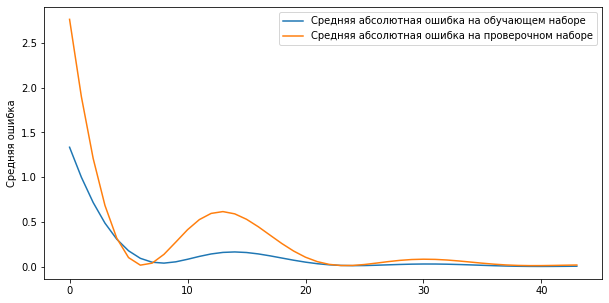

In [65]:
#Выводим графики
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

1/1 [==============================] - 0s 54ms/step


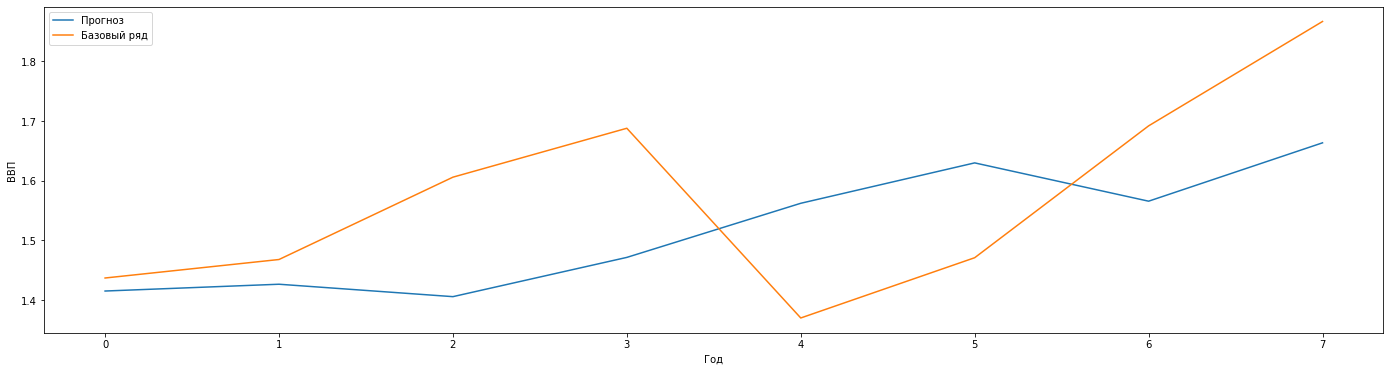

In [66]:
#Прогнозируем данные текущей сетью
currModel = modelD #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 20, 0, predVal, yValUnscaled)

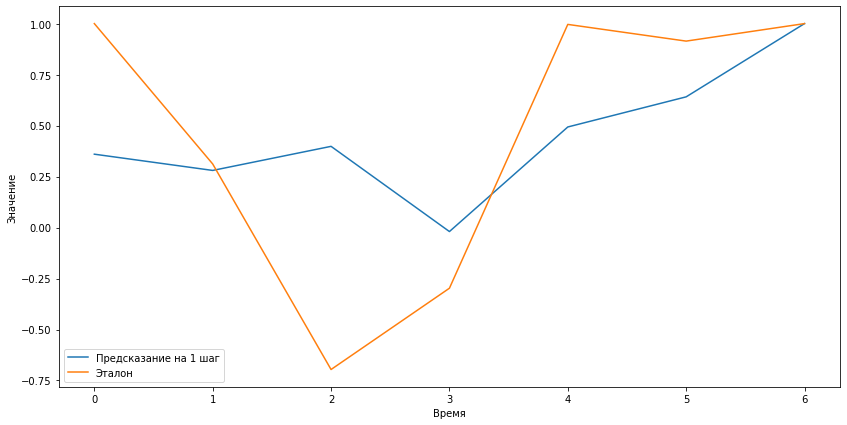

In [67]:
#Отображаем корреляцию
showCorr([0], 7, predVal, yValUnscaled)

1/1 [==============================] - 0s 15ms/step


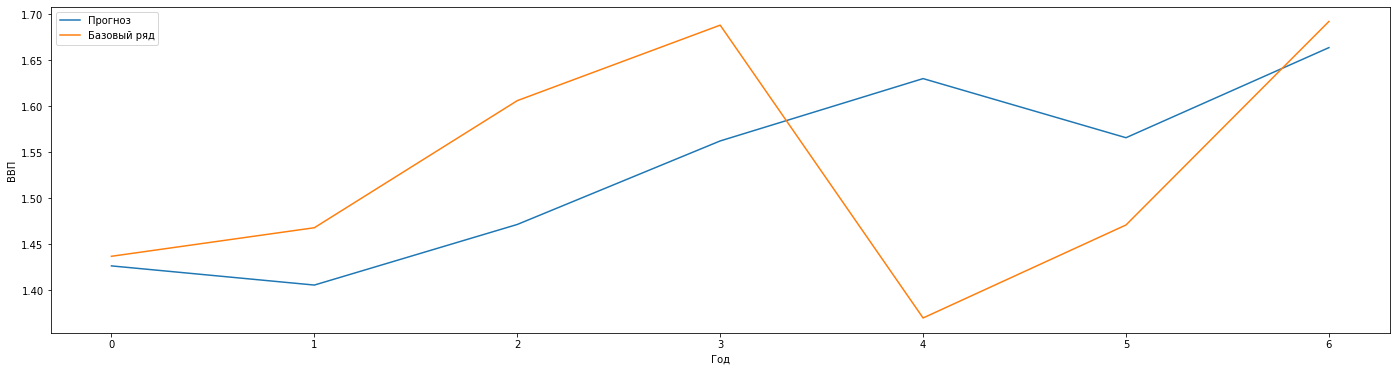

In [68]:
#Прогнозируем данные текущей сетью
currModel = modelD #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 20, 0, predVal[1:], yValUnscaled[:-1])